**Maurice A. Santos**

**BSCS 3A - IS**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA

In [10]:
data = pd.read_csv('most-polluted-countries.csv')

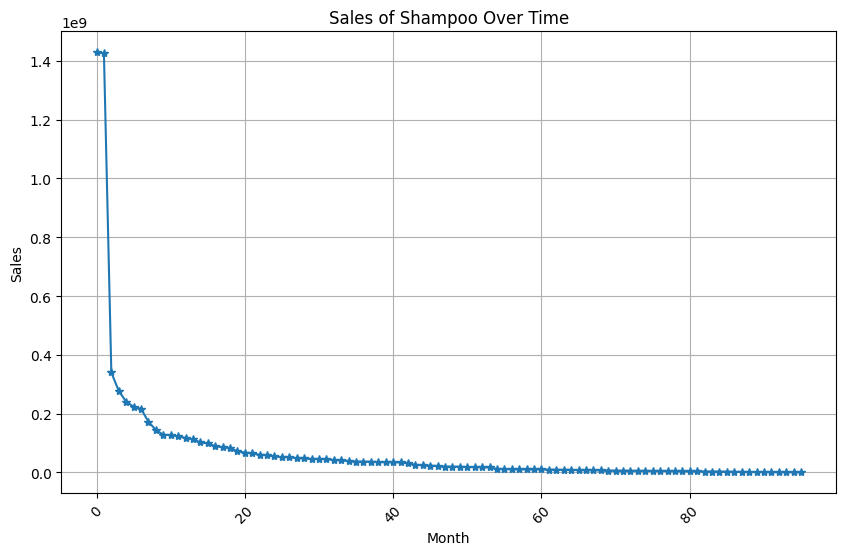

In [11]:
plt.figure(figsize = (10, 6))
plt.plot(data.index, data['pollution_2023'], marker = '*', linestyle = '-')
plt.title('Sales of Shampoo Over Time')

plt.xlabel('Month')
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [12]:
pollution_levels = data['pollution_2023']

# Perform ADF test
result = adfuller(pollution_levels)
p_value = result[1]

# Interpretation
if p_value < 0.05:
    print(f"P-value: {p_value:.4f} (Reject null hypothesis)")
    print("The time series is likely stationary.")
else:
    print(f"P-value: {p_value:.4f} (Fail to reject null hypothesis)")
    print("The time series is likely non-stationary.")

# Implications
print("\nImplications:")
print("1. Stationary time series are easier to model and analyze.")
print("2. Non-stationary time series may exhibit trends or seasonality, making predictions challenging.")
print("3. If the time series is non-stationary, consider differencing or other transformations to achieve stationarity.")


P-value: 0.0148 (Reject null hypothesis)
The time series is likely stationary.

Implications:
1. Stationary time series are easier to model and analyze.
2. Non-stationary time series may exhibit trends or seasonality, making predictions challenging.
3. If the time series is non-stationary, consider differencing or other transformations to achieve stationarity.


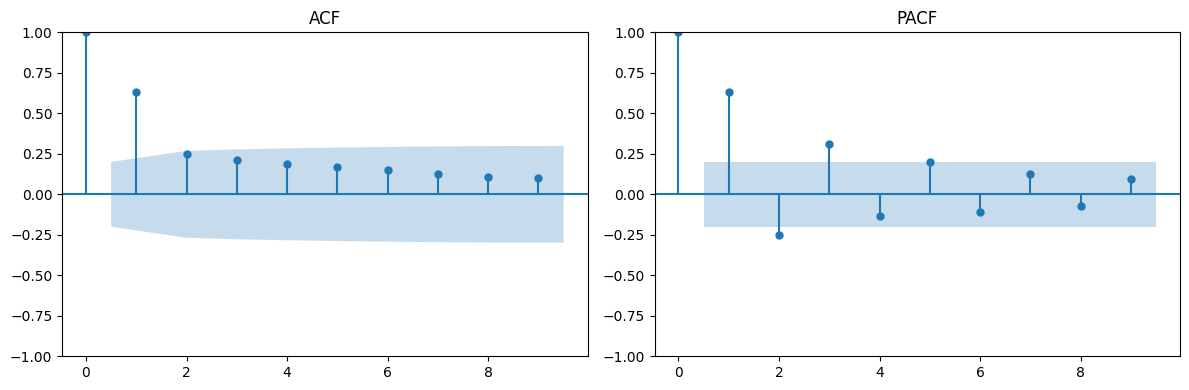

In [13]:
pollution_levels = data['pollution_2023']

# Create ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(pollution_levels, lags=9, ax=axes[0], title="ACF")
plot_pacf(pollution_levels, lags=9, ax=axes[1], title="PACF")

plt.tight_layout()
plt.show()


In [14]:
adf_test = adfuller(data['pollution_2023'])
print('ADF Statistics: ', adf_test[0])
print('p-value:', adf_test[1])

ADF Statistics:  -3.300734202893016
p-value: 0.01484568748394119


In [15]:
model = ARIMA(data['pollution_2023'], order = (1, 1, 1))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21643.144
Date:                Thu, 28 Mar 2024   AIC                          43292.288
Time:                        13:16:58   BIC                          43299.949
Sample:                             0   HQIC                         43295.384
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6301      0.000   3971.372      0.000       0.630       0.630
ma.L1         -0.9165      0.000  -5155.984      0.000      -0.917      -0.916
sigma2      2.177e+13   1.04e-17   2.09e+30      0.0

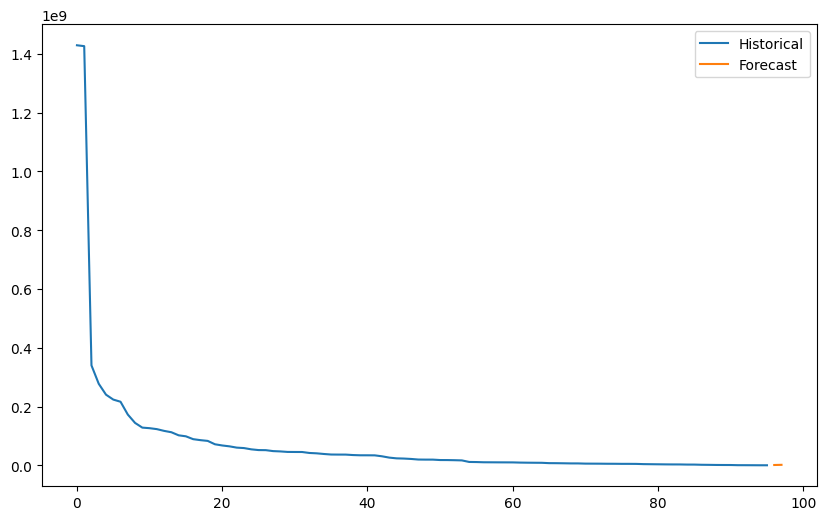

In [16]:
forecast = results.forecast(steps = 2) # 2 = 2 years

plt.figure(figsize = (10, 6))
plt.plot(data.index, data['pollution_2023'], label = 'Historical')
plt.plot(forecast.index, forecast, label = 'Forecast')
plt.legend()
plt.show()